### Deterministic Optimal Control in Continous Time
***
$u(t)$: control at t\
$x(t)$: state vector at t\
$x_{0}$: initial state\
$g(x(t),u(t))$: instantaneous rate of change in state\
$h(x(t),u(t))$: instantaneous reward\
$V(x_{0})$: cumulative discounted reward from initial state $x_{0}$\
$\rho \geq 0$: discount parameter


$$
V(x_{0})=\underset{u(t)^{\infty}_{t=0}}{max} \int^{\infty}_{0} e^{-\rho t} h(x(t),u(t)) dt\\
\forall t\geq0, \dot{x(t)}=g(x(t),u(t))\\
x(0)=x_{0}
$$
***
Hamiltonian: $H(x,u,\lambda) = h(x,u) + \lambda g(x,u)$\
If $x,u,\lambda$ are optimal paths then,\
(1) $H_{u}(x,u,\lambda)=0$\
(2) $\dot{\lambda}=\rho\lambda-H_{x}(x,u,\lambda)$\
(3) $\dot{x}=g(x,u)$\
(4) $x(0) = x_{0}$\
(5) $\lim_{T\to\infty} e^{-\rho T}\lambda(T)x(T) = 0$ (Transversality)
***

# Example 1: Cake Eating


$h(x,u) = \log u(t)$\
$g(x,u) = - u(t)$\
$\rho = 1.5$\
$x_{0} = 1$

***
Hamiltonian: $H(x,u,\lambda) = \log u + \lambda (x - u)$\
(1) $\dot{u} = (1-\rho)u $\
(2) $\dot{x}=-u$\
(3) $x(0) = 1$
(3) $e(0) = 1$

***

2-Variable, First Order ODE System:\
$$
x′(t) = + 0 x(t) - 1 u(t) \\
u′(t) = - 0 x(t) - 0.5 u(t) \\
\text{$x(0)=1, x(T)=0$}\\
t ∈ (0,T]\\
$$


1.871524593768035e-13


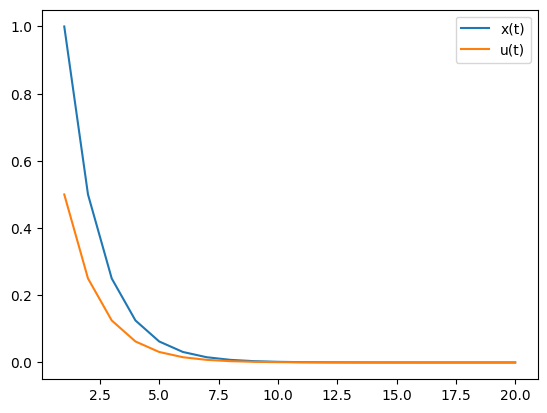

1.871524593768035e-13


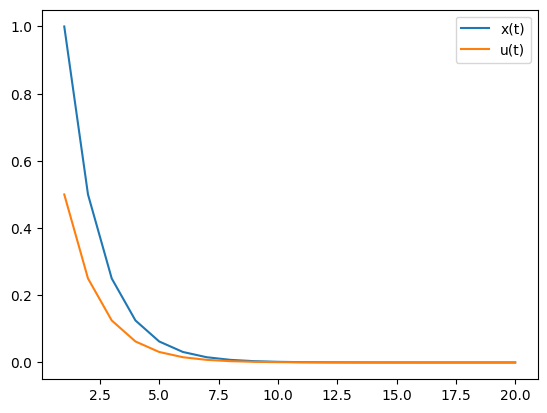

1.871524593768035e-13


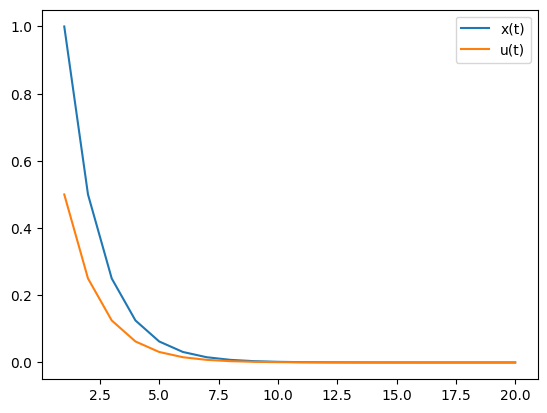

1.871524593768035e-13


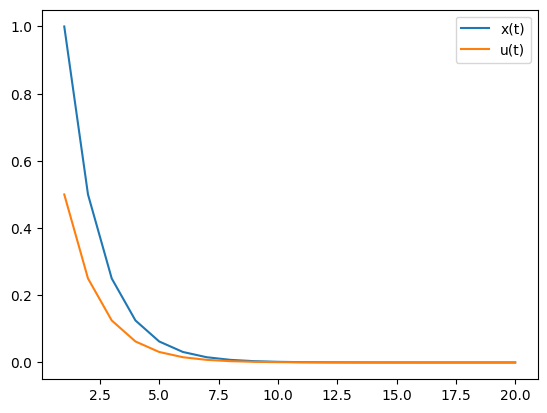

1.871524593768035e-13


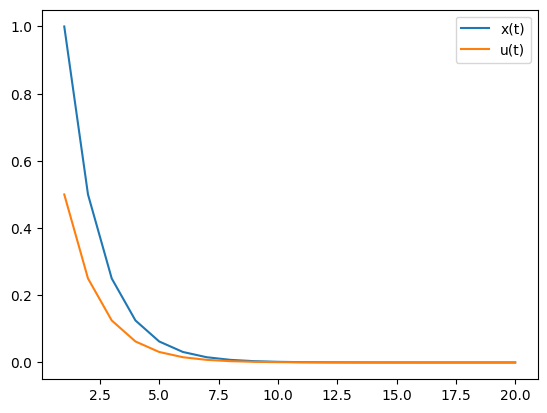

1.871524593768035e-13


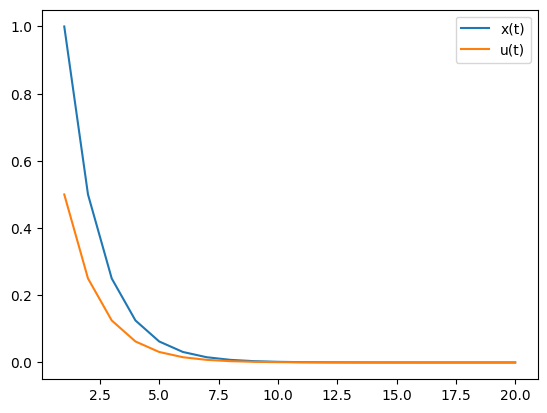

1.871524593768035e-13


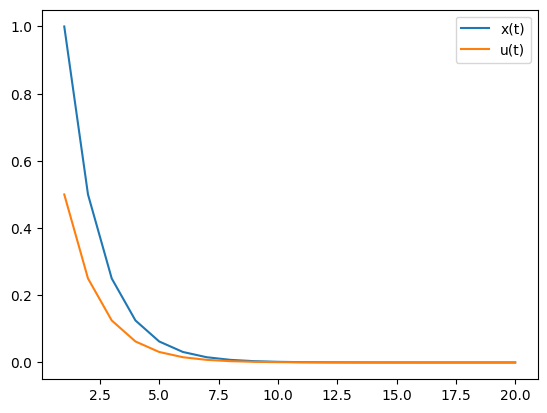

1.871524593768035e-13


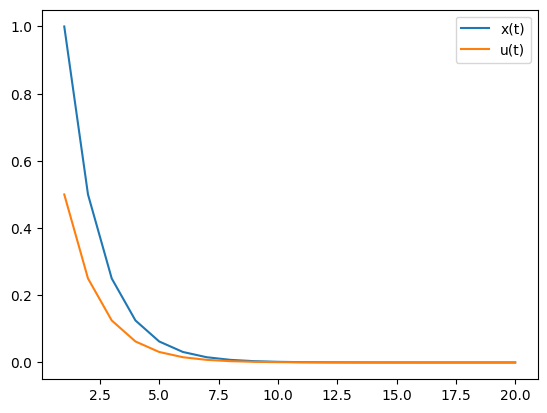

1.871524593768035e-13


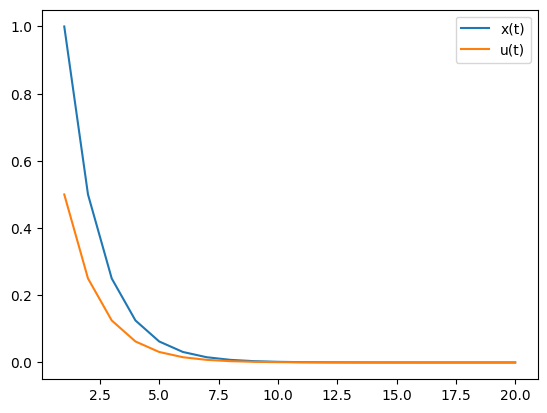

1.871524593768035e-13


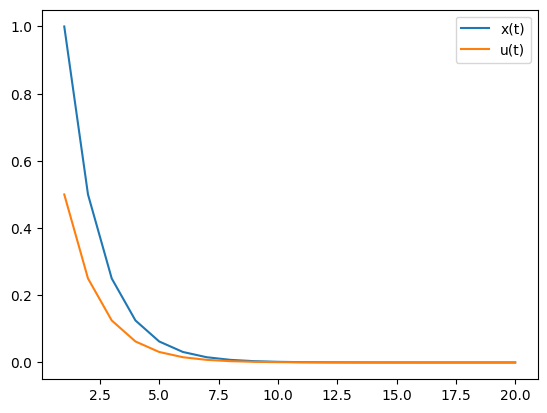

1.871524593768035e-13


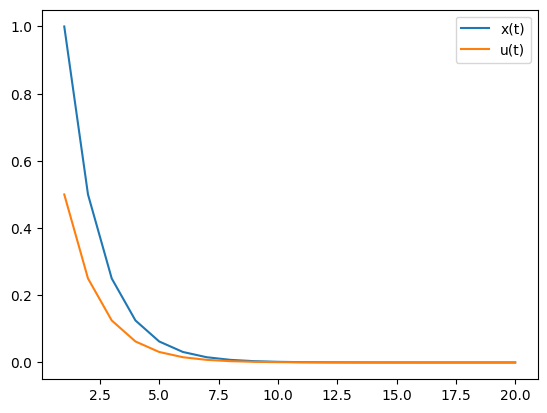

1.871524593768035e-13


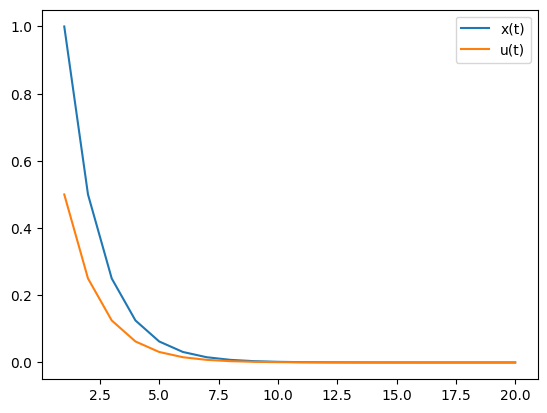

1.871524593768035e-13


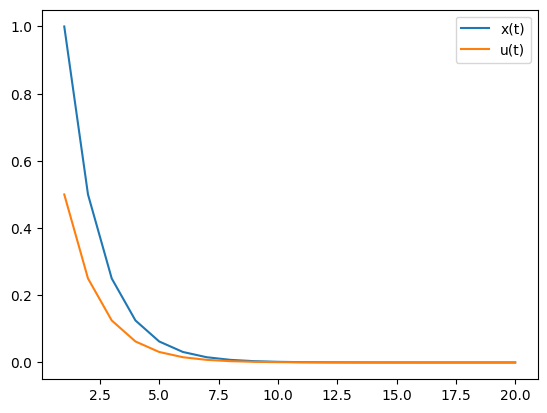

1.871524593768035e-13


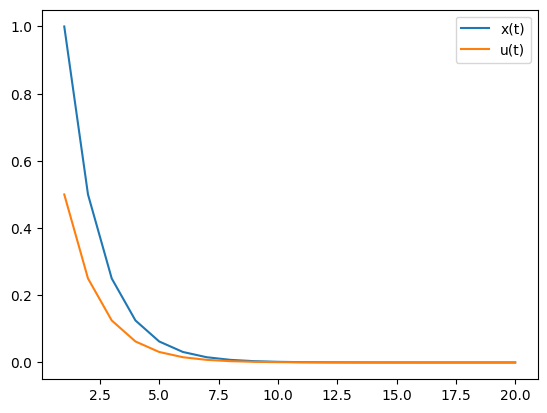

1.871524593768035e-13


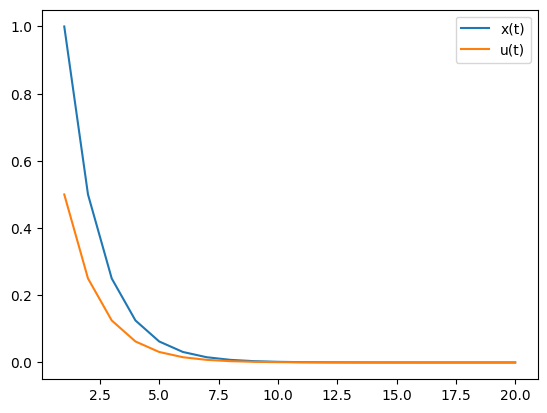

1.871524593768035e-13


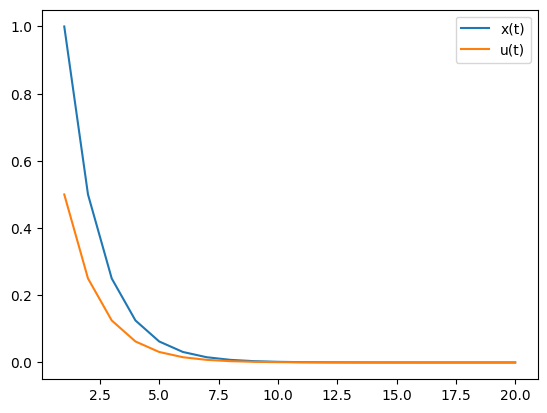

1.871524593768035e-13


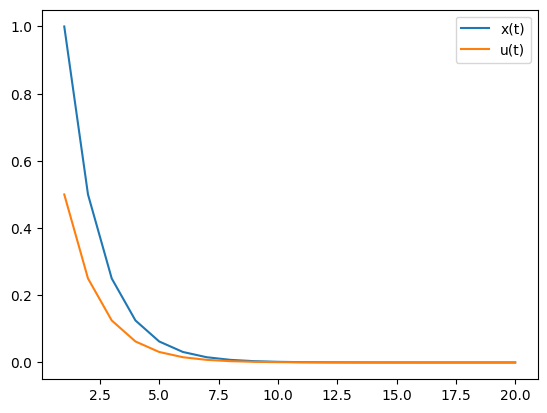

1.871524593768035e-13


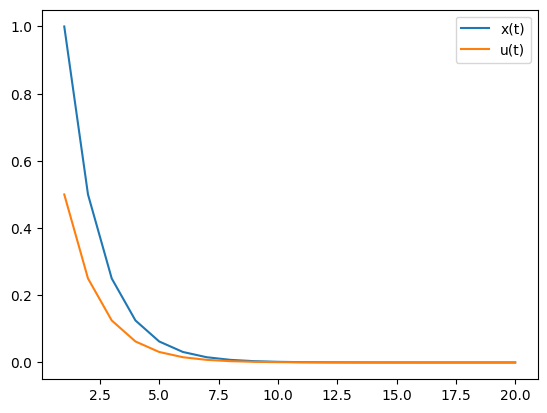

1.871524593768035e-13


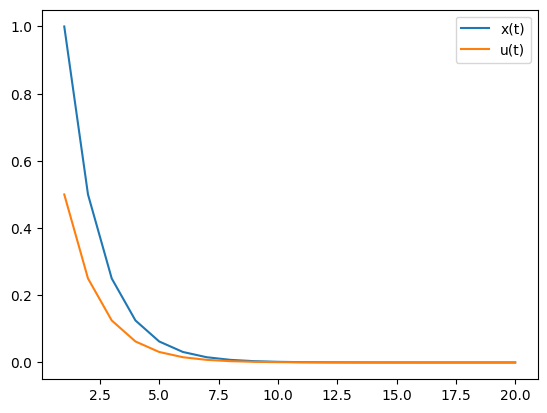

1.871524593768035e-13


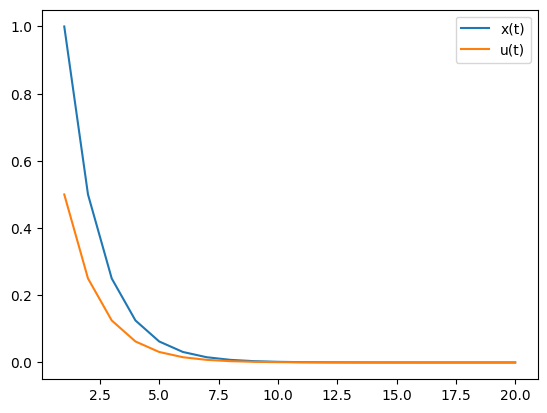

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Model Parameters
T_max = 20
T_min = 1
rho = 1.5

for u0 in np.linspace(0.01, 0.99, 20):
    u0 = 0.5
    X0 = np.array([1, u0])
    A = np.array([[0, -1],[0, 1-rho]])
    N = 19
    def grids(T_min, T_max, N, X0):
        X_grid = np.zeros((N+1, X0.shape[0]))
        t_grid = np.linspace(T_min, T_max, N+1)
        return t_grid, X_grid
    
    def interpolate(t_grid, X_grid, X0, A, N):
        X_grid[0, :] = X0
        for i in range(N):
            for j in range(X0.shape[0]):
                X_grid[i+1, j] = X_grid[i,j] + (t_grid[i+1]-t_grid[i]) * np.dot(A[j], X_grid[i,:])
        return X_grid
    
    def transversality(X_grid):
        xT, uT = X_grid[-1, :] 
        print(np.exp(-rho * T_max) * xT/uT)

    t_grid, X_grid = grids(T_min, T_max, N, X0)
    X_grid = interpolate(t_grid, X_grid, X0, A, N)
    transversality(X_grid)
    
    plt.plot(t_grid, X_grid[:,0], label='x(t)')
    plt.plot(t_grid, X_grid[:,1], label='u(t)')

    plt.legend()
    plt.show()